# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
pip install palmerpenguins

In [ ]:
import palmerpenguins
import pandas as pd

# Load the penguins dataset into a pandas DataFrame
df = palmerpenguins.load_penguins()

# Display the first few rows

df=df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
# Code Here
# simple linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
# simple linear model
bill_model = LinearRegression()
bill_model.fit(
    X=df[["bill_length_mm"]].dropna(),
    y=df["bill_depth_mm"].dropna()
)

LinearRegression()

In [ ]:
bill_model.coef_, bill_model.intercept_

(array([-0.08232675]), np.float64(20.786648668433827))

In [ ]:
df["bill_predict"] = bill_model.predict(df[["bill_length_mm"]])

In [ ]:
# quadratic model
df["bill_depth_mm_square"] = df["bill_length_mm"] ** 2
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict,bill_depth_mm_square
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64


In [ ]:
square_model = LinearRegression()
square_model.fit(
    X=df[["bill_length_mm", "bill_depth_mm_square"]],
    y=df["bill_depth_mm"]
)

LinearRegression()

In [ ]:
df["square_predict"] = square_model.predict(df[["bill_length_mm", "bill_depth_mm_square"]])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict,bill_depth_mm_square,square_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,17.497696
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,17.407049
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,17.240135
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,18.142249
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,17.451773
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,17.790977
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,16.764229
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,16.706871
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,16.826816


In [ ]:
square_model.coef_, square_model.intercept_

(array([-1.40407712,  0.01498039]), np.float64(49.49494362318971))

In [ ]:
# cubic
df["bill_depth_mm_cubic"] = df["bill_length_mm"] ** 3
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict,bill_depth_mm_square,square_predict,bill_depth_mm_cubic
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,17.497696,59776.471
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,17.407049,61629.875
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,17.240135,65450.827
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,18.142249,49430.863
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,17.451773,60698.457
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,17.790977,173741.112
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,16.764229,82312.875
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,16.706871,122023.936
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,16.826816,131096.512


In [ ]:
cubic_model = LinearRegression()
cubic_model.fit(
    X=df[["bill_length_mm", "bill_depth_mm_cubic"]],
    y=df["bill_depth_mm"]
)

LinearRegression()

In [ ]:
cubic_model.coef_, cubic_model.intercept_

(array([-7.60879823e-01,  1.14977960e-04]), np.float64(40.39532395150417))

In [ ]:
# degree 10 polynomial
df["bill_depth_mm_poly"] = df["bill_length_mm"] ** 10
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_predict,bill_depth_mm_square,square_predict,bill_depth_mm_cubic,bill_depth_mm_poly
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,17.497696,59776.471,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,17.407049,61629.875,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,17.240135,65450.827,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,18.142249,49430.863,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,17.451773,60698.457,8.788717e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,16.192816,3113.64,17.790977,173741.112,2.926456e+17
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,17.205435,1892.25,16.764229,82312.875,2.426010e+16
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,16.703242,2460.16,16.706871,122023.936,9.011908e+16
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,16.604450,2580.64,16.826816,131096.512,1.144556e+17


In [ ]:
poly_model = LinearRegression()
poly_model.fit(
    X=df[["bill_length_mm", "bill_depth_mm_poly"]],
    y=df["bill_depth_mm"]
)

LinearRegression()

In [ ]:
poly_model.coef_, poly_model.intercept_

(array([-1.16859702e-34, -1.58030886e-18]), np.float64(17.242970254444263))

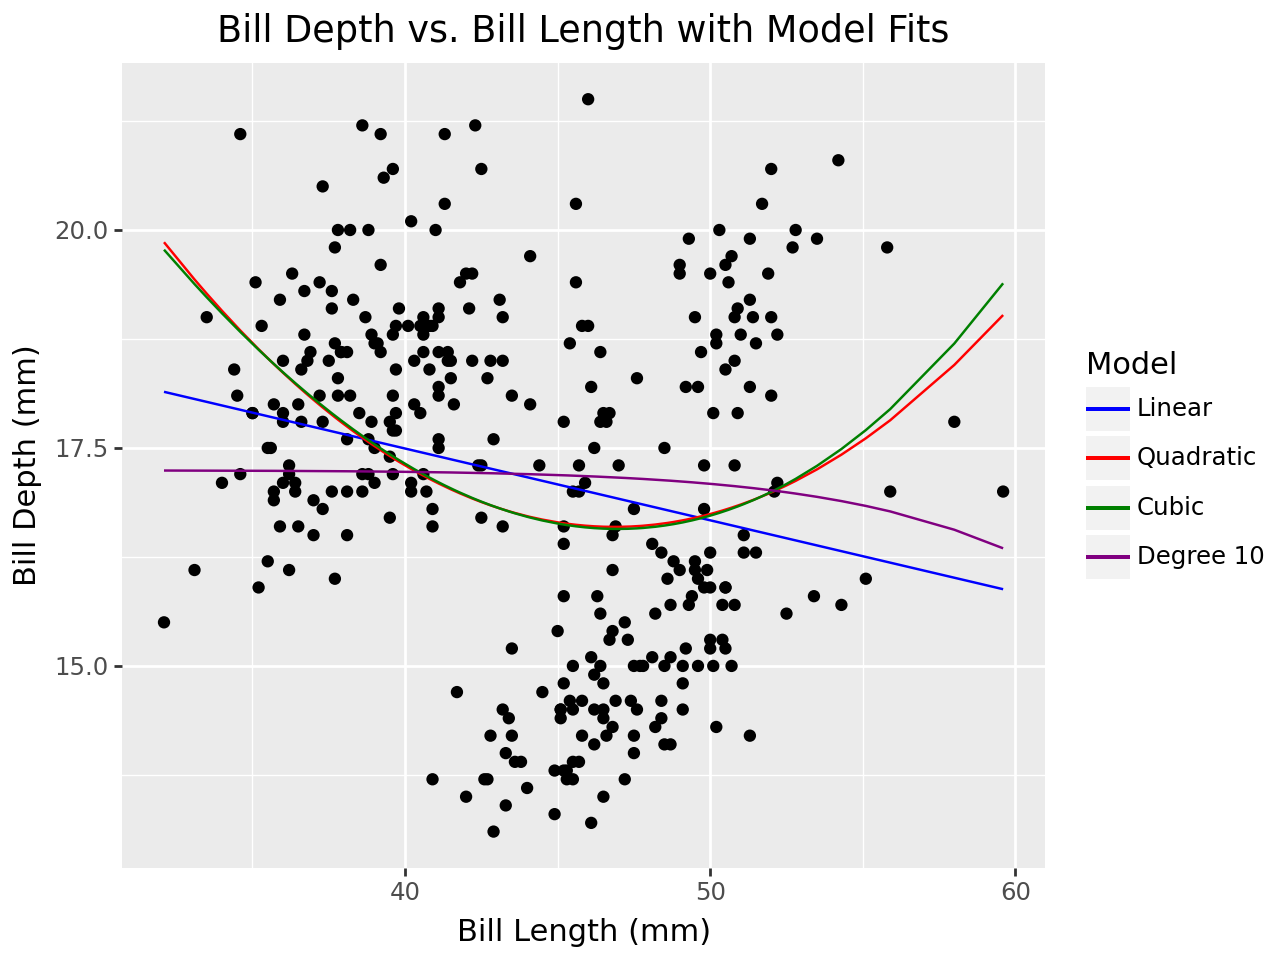

In [ ]:
# plot
from plotnine import *
import pandas as pd

# Create a DataFrame with the predicted values for each model
predicted_df = pd.DataFrame({
    'bill_length_mm': df['bill_length_mm'],
    'bill_predict': df['bill_predict'],
    'square_predict': df['square_predict'],
    'cubic_predict': cubic_model.predict(df[["bill_length_mm", "bill_depth_mm_cubic"]]), # Add cubic predictions
    'poly_predict': poly_model.predict(df[["bill_length_mm", "bill_depth_mm_poly"]]) # Add polynomial predictions
})

(
    ggplot(df, aes(x='bill_length_mm', y="bill_depth_mm"))
    + geom_point()
    + geom_line(predicted_df, aes(y='bill_predict', color="'Linear'")) # Plot linear model
    + geom_line(predicted_df, aes(y='square_predict', color="'Quadratic'")) # Plot quadratic model
    + geom_line(predicted_df, aes(y='cubic_predict', color="'Cubic'")) # Plot cubic model
    + geom_line(predicted_df, aes(y='poly_predict', color="'Degree 10'")) # Plot polynomial model
    + labs(
        title='Bill Depth vs. Bill Length with Model Fits',
        x='Bill Length (mm)',
        y='Bill Depth (mm)'
    )
    + scale_color_manual(name="Model", values={"Linear": "blue", "Quadratic": "red", "Cubic": "green", "Degree 10": "purple"}) # Add legend
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model underfits the data because there are less points aligned to the line.
The quadratic and the cubic models are overfitting the data and you can tell from this by how theres more points aligned to the curves.
The one that best fits the model is the polynomial degree 10 line because it does the best job in explaining the variation in bill depth.